In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model

In [32]:
import pandas as pd

# df = pd.read_csv('../res/crawl_investor_daily_volume.csv').fillna(0)
df = pd.read_csv('../res/crwal_investor_stock_type.csv') #, index_col='DATEON'
#df = df.sort_values(by=['DATEON'], axis=0, ascending=True)
df['DATEON'] = df['DATEON'].str[2:]
df = df.set_index('DATEON')

## Join Tables
df2 = pd.read_csv('../res/crawl_investor_daily_volume.csv', index_col='DATEON')
#df2 = df2.drop(columns=['TYPE_CODE'])
#df2
# df3 = df.join(df2, how='inner', on='DATEON')
df3 = pd.merge(left=df, right=df2, how='inner', on='DATEON')

df3['FOR_BUY_D14']=df3.FOR_BUY.rolling(14).sum().shift(1)
df3['FOR_BUY_D7']=df3.FOR_BUY.rolling(7).sum().shift(1)
df3['COMP_BUY_D14']=df3.COMP_BUY.rolling(14).sum().shift(1)
df3['COMP_BUY_D7']=df3.COMP_BUY.rolling(7).sum().shift(1)

df3['DELTA_OUT']=df3.UPDOWN_PER.shift(-1)
# df3 = df3.sort_values(by=['DATEON'], axis=0, ascending=False)
# df = df[['DATEON', 'END_VALUE', 'DELTA_OUT', 'VOLUME', 'UPDOWN_PER', 'COMP_BUY', 'COMP_BUY_D7', 'COMP_BUY_D14', 'FOR_BUY', 'FOR_BUY_D7', 'FOR_BUY_D14']]

df3 = df3.dropna()
df3.fillna(0)
df3

,TYPE_CODE_x,END_VALUE,DELTA,UPDOWN_PER,VOLUME,COMP_BUY,FOR_BUY,FOR_CONT,FOR_PER,TYPE_CODE_y,...,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,FOR_BUY_D14,FOR_BUY_D7,COMP_BUY_D14,COMP_BUY_D7,DELTA_OUT
DATEON,,,,,,,,,,,,,,,,,,,,,
16.02.02,233740,11985.0,40.0,0.33,1091070.0,66242.0,0.0,0.0,0.00,1,...,-156.0,-50.0,-50.0,-96.0,586.0,0.0,0.0,763967.0,677038.0,-0.96
16.02.03,233740,11870.0,-115.0,-0.96,1198020.0,-46529.0,0.0,0.0,0.00,1,...,2.0,2.0,57.0,17.0,681.0,0.0,0.0,871546.0,718417.0,0.04
16.02.04,233740,11875.0,5.0,0.04,1816400.0,-50894.0,0.0,0.0,0.00,1,...,161.0,-15.0,1.0,152.0,416.0,0.0,0.0,769026.0,351588.0,-0.67
16.02.05,233740,11795.0,-80.0,-0.67,1017640.0,-8125.0,0.0,0.0,0.00,1,...,98.0,-106.0,-23.0,608.0,-4118.0,0.0,0.0,928365.0,201153.0,-9.75
16.02.11,233740,10645.0,-1150.0,-9.75,1942020.0,-678720.0,0.0,0.0,0.00,1,...,-59.0,-37.0,-12.0,201.0,616.0,0.0,0.0,831238.0,360149.0,-14.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.07.19,233740,10740.0,170.0,1.61,15638800.0,-296311.0,46680.0,722059.0,0.72,1,...,-1706.0,-94.0,-19.0,-1083.0,20.0,154128.0,-234890.0,-1021700.0,-16580110.0,-4.93
24.07.22,233740,10210.0,-530.0,-4.93,25376100.0,-10601000.0,-671720.0,50339.0,0.05,1,...,-703.0,-38.0,-7.0,-936.0,-332.0,291888.0,54884.0,-4560341.0,-16967239.0,0.64
24.07.23,233740,10275.0,65.0,0.64,20878400.0,-990217.0,192766.0,343105.0,0.32,1,...,769.0,-137.0,-35.0,137.0,-266.0,151081.0,-669333.0,-5561821.0,-26385949.0,0.83


In [14]:
# def convert(s: str) -> str:
#     return s.replace(',', '')
# 
# df3 = df3['DATEON'].apply(convert)
# df3

KeyError: 'DATEON'

In [33]:
# We want 80% of the data to be used for training, and 20% for testing
n_train_rows = int(df3.shape[0]*.8)-1

# Split into train and test sets but keep all 9 columns
train = df3.iloc[:n_train_rows, :]
test = df3.iloc[n_train_rows:, :]

# The total rows of the two datasets should equal the total amount of rows in your CSV
print(train.shape)
print(test.shape)

(1667, 25)
(418, 25)


In [34]:
# Normalise features
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train.values)
test_set_scaled = sc.fit_transform(test.values)

In [35]:
steps = 50

# Prepare the training data
x_train = []
y_train = []

for i in range(steps, training_set_scaled.shape[0]-steps):
    x_train.append(training_set_scaled[i-steps:i, :])
    y_train.append(training_set_scaled[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(1567, 50, 25)


In [22]:
# Prepare the test data
x_test = []
y_test = []

for i in range(steps, test_set_scaled.shape[0]):
    x_test.append(test_set_scaled[i-steps:i, :])
    y_test.append(test_set_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(368, 50, 25)


In [28]:
model = Sequential()

epochs = 100

model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],25)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.compile(loss="mse", optimizer="adam")
model.fit(x_train, y_train, batch_size = 32, epochs = epochs)
model.summary

model.save("multiple_features_"+str(steps)+"_steps_"+str(epochs)+"_epochs.h5")
print("Saved model to disk")

Epoch 1/100
49/49 [==============================] - 4s 34ms/step - loss: 0.0710
Epoch 2/100
49/49 [==============================] - 2s 34ms/step - loss: 0.0226
Epoch 3/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0174
Epoch 4/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0151
Epoch 5/100
49/49 [==============================] - 2s 38ms/step - loss: 0.0130
Epoch 6/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0117
Epoch 7/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0104
Epoch 8/100
49/49 [==============================] - 2s 38ms/step - loss: 0.0093
Epoch 9/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0090
Epoch 10/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0084
Epoch 11/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0079
Epoch 12/100
49/49 [==============================] - 2s 37ms/step - loss: 0.0075
Epoch 13/100
49/49 [=====

/Users/horus/miniforge3/envs/MyPythonProject/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data


ValueError: Data cardinality is ambiguous:
  x sizes: 368
  y sizes: 418
Make sure all arrays contain the same number of samples.

In [30]:
# Predict values from test data trained using training data
y_hat = model.predict(x_test)
y_hat = sc.inverse_transform(y_hat)

12/12 [==============================] - 1s 9ms/step


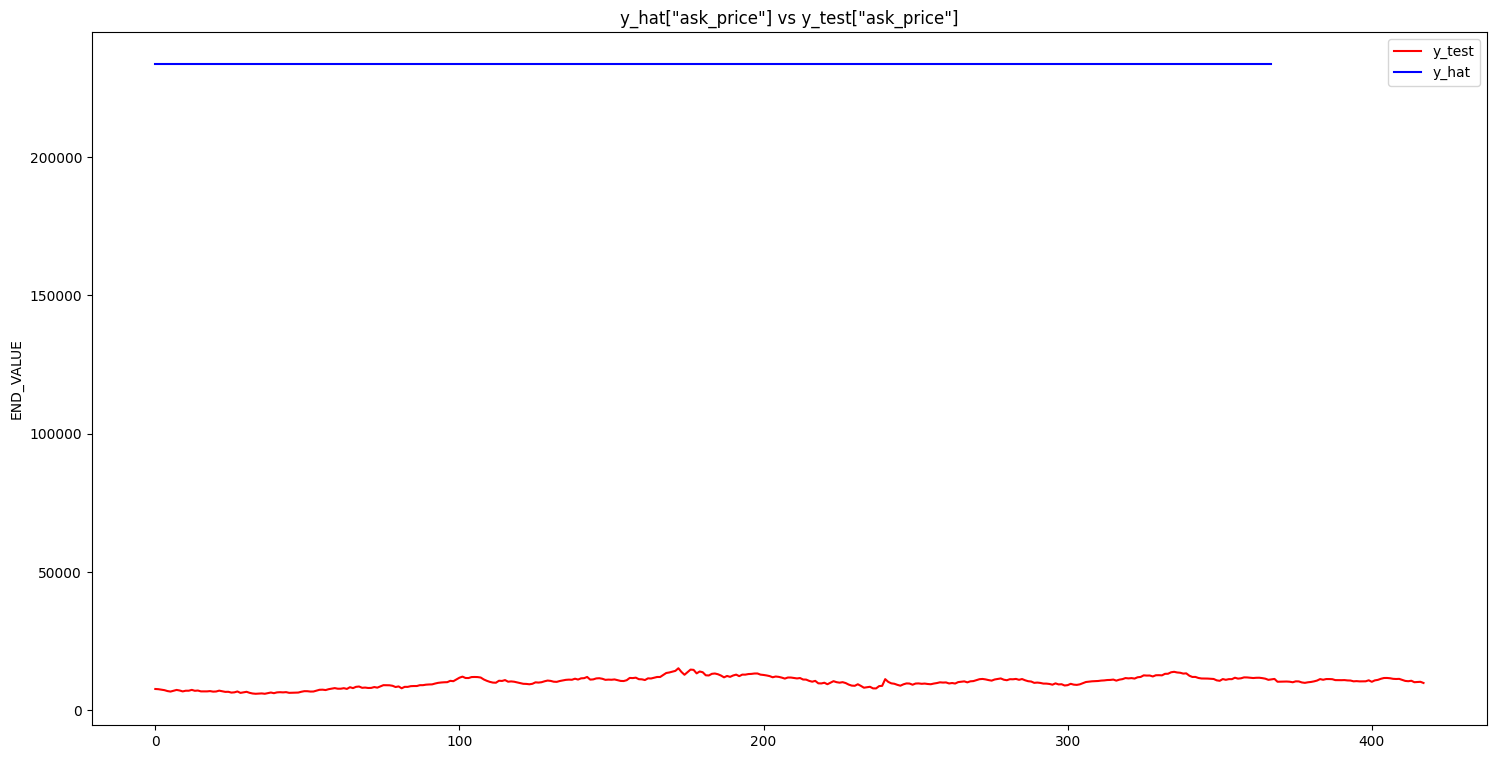

In [31]:
y_test = test.reset_index()

# Visualise the ask_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['END_VALUE'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,0], color = 'blue', label = 'y_hat')
plt.title('y_hat["ask_price"] vs y_test["ask_price"]')
plt.ylabel('END_VALUE')
plt.legend()
plt.show()